In [2]:
# check version
from pycaret.utils import version
version()

ModuleNotFoundError: No module named 'pycaret'

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='NBA1')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [5]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2671.1115,23031333.9247,4795.9477,0.8391,0.4429,0.3133,0.0220
catboost,CatBoost Regressor,2834.6112,25122500.5678,5010.4374,0.8238,0.4876,0.3500,1.6460
rf,Random Forest Regressor,2766.9803,25262509.6700,5023.3122,0.8223,0.4812,0.3431,0.1840
lightgbm,Light Gradient Boosting Machine,3018.9895,25515012.2780,5049.8492,0.8192,0.5534,0.3876,0.0480
et,Extra Trees Regressor,2804.9711,28728744.5101,5351.1199,0.8004,0.4932,0.3334,0.1700
ada,AdaBoost Regressor,4366.1001,29298215.0099,5411.0606,0.7915,0.6478,0.7662,0.0140
xgboost,Extreme Gradient Boosting,3257.2767,31489404.4000,5610.5080,0.7774,0.5723,0.4072,0.4760
llar,Lasso Least Angle Regression,4326.7378,38523190.9483,6194.6381,0.7345,0.6004,0.4409,0.0080
br,Bayesian Ridge,4344.6330,38551085.7398,6197.1147,0.7343,0.6400,0.4437,0.0080
lar,Least Angle Regression,4332.7637,38549926.0433,6197.0821,0.7343,0.6368,0.4415,0.0080


In [6]:

dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3001.2294,37001480.2590,6082.8842,0.7790,0.4984,0.3140
1,3389.8885,49305179.5732,7021.7647,0.7133,0.5574,0.3361
2,2926.0191,42025684.6666,6482.7220,0.4679,0.6215,0.4025
3,2744.7144,34078761.4507,5837.7017,0.7154,0.5412,0.3740
4,3924.4816,59489464.3207,7712.9414,0.5575,0.6455,0.4796
5,3322.5435,42747575.4453,6538.1630,0.7250,0.4869,0.2928
6,3158.7047,49369669.1652,7026.3553,0.6641,0.4511,0.3089
7,2405.2970,31318616.6440,5596.3038,0.8278,0.4497,0.1434
8,3021.5461,39091793.3775,6252.3430,0.7475,0.5117,0.4381
9,3588.9772,53231891.5889,7296.0189,0.6571,0.5679,0.3653


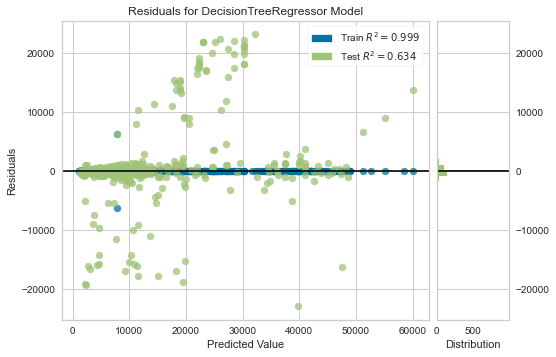

In [7]:

plot_model(dt)

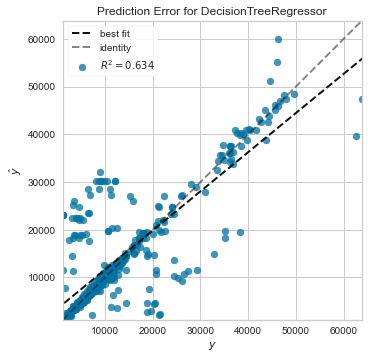

In [8]:

plot_model(dt, plot = 'error')

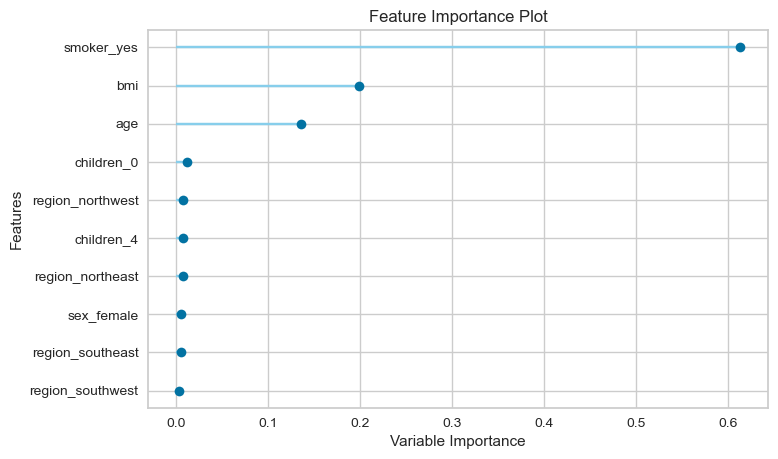

In [9]:
plot_model(dt, plot = 'feature')

In [10]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [11]:
best = automl(optimize = 'MAE')
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,18250.267800
1,18,male,33.770,1,no,southeast,4346.966238
2,28,male,33.000,3,no,southeast,5738.513008
3,33,male,22.705,0,no,northwest,9463.134193
4,32,male,28.880,0,no,northwest,3888.666127


In [13]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           